In [34]:
import pandas as pd
import numpy as np
import re
import pprint
from collections import defaultdict

import string
from string import punctuation

import os

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly as py
import plotly.graph_objs as go
init_notebook_mode(connected=True)

import gensim
from gensim import corpora, models, similarities

import nltk
from nltk.corpus import stopwords
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [35]:
df = pd.read_csv(r'C:\Users\Luca Nannini\Desktop/AllDebates.csv')
df.set_index("TURN STARTS", inplace= True)
first_debate = df.iloc[:131]
#first debate text:
debate = list(first_debate.TEXT)

# First Debate Overall LDA

In [36]:
debtok = [
     [word for word in document.lower().split()]
    for document in debate
 ]

In [37]:
debate = [list(filter(None, [re.sub(r'\d+','', x) for x in y])) for y in
       debtok]
# remove words less than two letters
debate = [list(filter(None, [re.sub(r'\W*\b\w{1,2}\b','', x) for x in y])) for y in
       debate]
# remove punctuation
debate = [list(filter(None, [re.sub("[\.\,\…\!\?\:\;\-\—\_\=\*\@\#\$\"\''\``]",'', x) for x in y]))
                                    for y in debate]

# remove common words and tokenize
stoplist = stopwords.words('english')
stoplist = ['people','want','know','believe','you','really','lot','tell','young','stopandfrisk','that','get','got','much','many','put','kind','thanks','thank','think','well','nobody','take','taken','taking','going','go','things','maybe','something','yes','way','would','could','actually','almost','see','seen','sean','called','thing','let','done','went','say','whether','said','look','one','like','also','good','new','ever','little','cannot','everything','lester','even','hannity'] + list(stoplist)

cleaned_debate = [
     [word for word in document if word not in stoplist]
    for document in debate
 ]

In [38]:
dictionary = corpora.Dictionary(cleaned_debate)
corpus = [dictionary.doc2bow(text) for text in cleaned_debate]

total_topics = 5
lda = models.LdaModel(corpus, id2word=dictionary, num_topics=total_topics, passes=50, per_word_topics=True)

In [39]:
lda.show_topics(total_topics,10)

[(0,
  '0.007*"war" + 0.007*"nato" + 0.007*"business" + 0.006*"country" + 0.006*"years" + 0.004*"secretary" + 0.004*"release" + 0.004*"need" + 0.004*"tax" + 0.004*"right"'),
 (1,
  '0.009*"jobs" + 0.009*"deal" + 0.009*"iran" + 0.009*"country" + 0.008*"donald" + 0.007*"nuclear" + 0.007*"secretary" + 0.006*"bad" + 0.006*"wrong" + 0.005*"countries"'),
 (2,
  '0.010*"country" + 0.008*"money" + 0.008*"tax" + 0.008*"police" + 0.007*"communities" + 0.007*"jobs" + 0.006*"back" + 0.006*"work" + 0.005*"bring" + 0.005*"regulations"'),
 (3,
  '0.013*"jobs" + 0.010*"country" + 0.009*"million" + 0.009*"nuclear" + 0.008*"back" + 0.008*"defend" + 0.008*"president" + 0.007*"years" + 0.005*"website" + 0.005*"debt"'),
 (4,
  '0.018*"country" + 0.013*"need" + 0.007*"isis" + 0.007*"make" + 0.007*"chicago" + 0.006*"order" + 0.006*"secretary" + 0.005*"donald" + 0.005*"law" + 0.005*"money"')]

### First Debate Semantic Heatmap

In [40]:
from collections import OrderedDict

data_lda = {i: OrderedDict(lda.show_topic(i,25)) for i in range(total_topics)}
#data_lda

In [41]:
df_lda = pd.DataFrame(data_lda)
print(df_lda.shape)
df_lda = df_lda.fillna(0).T
print(df_lda.shape)

(90, 5)
(5, 90)


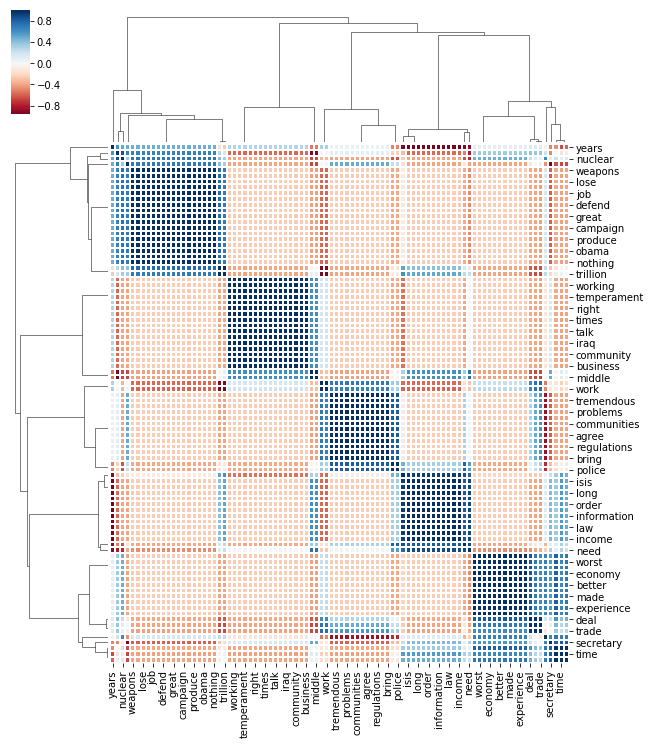

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

g=sns.clustermap(df_lda.corr(), center=0, cmap="RdBu", metric='cosine', linewidths=1, figsize=(10, 12))
plt.setp(g.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.show()
#plt.setp(ax_heatmap.get_yticklabels(), rotation=0)  # For y axis

### First Debate pyLDAvis

In [43]:
import pyLDAvis.gensim

pyLDAvis.enable_notebook()
panel = pyLDAvis.gensim.prepare(lda, corpus, dictionary, mds='TSNE')
panel

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
0      -78.413925 -133.727173       1        1  25.232697
1      154.212097   54.758015       2        1  22.906607
4      -24.295353   31.164459       3        1  20.300699
2       51.394024 -258.513092       4        1  19.756111
3      155.837936 -119.283867       5        1  11.803883, topic_info=     Category       Freq         Term      Total  loglift  logprob
term                                                              
57    Default  26.000000         jobs  26.000000  30.0000  30.0000
1627  Default  13.000000      nuclear  13.000000  29.0000  29.0000
380   Default  17.000000         deal  17.000000  28.0000  28.0000
975   Default   7.000000      chicago   7.000000  27.0000  27.0000
1329  Default   5.000000       defend   5.000000  26.0000  26.0000
943   Default  13.000000       police  13.000000  25.0000  25.0000
217   Default  10.000000      million  10.000000  24.0000  24.0000
1344  Default  13.000000         iran  13.000000  23.0000  23.0000
1498  Default  11.000000         nato  11.000000  22.0000  22.0000
560   Default  15.000000         isis  15.000000  21.0000  21.0000
201   Default   6.000000   experience   6.000000  20.0000  20.0000
317   Default  16.000000         back  16.000000  19.0000  19.0000
291   Default  11.000000     trillion  11.000000  18.0000  18.0000
832   Default   8.000000     campaign   8.000000  17.0000  17.0000
412   Default  16.000000        money  16.000000  16.0000  16.0000
315   Default  10.000000        wrong  10.000000  15.0000  15.0000
534   Default   6.000000  regulations   6.000000  14.0000  14.0000
1599  Default  11.000000          war  11.000000  13.0000  13.0000
348   Default   9.000000         debt   9.000000  12.0000  12.0000
551   Default   5.000000      website   5.000000  11.0000  11.0000
150   Default   5.000000       losing   5.000000  10.0000  10.0000
361   Default   5.000000       looked   5.000000   9.0000   9.0000
31    Default   5.000000       energy   5.000000   8.0000   8.0000
67    Default  26.000000         need  26.000000   7.0000   7.0000
940   Default   8.000000        order   8.000000   6.0000   6.0000
498   Default  14.000000    president  14.000000   5.0000   5.0000
21    Default  51.000000      country  51.000000   4.0000   4.0000
918   Default  11.000000  communities  11.000000   3.0000   3.0000
1748  Default   5.000000      stamina   5.000000   2.0000   2.0000
1187  Default   3.000000        birth   3.000000   1.0000   1.0000
...       ...        ...          ...        ...      ...      ...
222    Topic5   2.595083      produce   3.950837   1.7164  -5.4204
551    Topic5   3.217519      website   5.304202   1.6369  -5.2054
31     Topic5   3.213702       energy   5.298385   1.6368  -5.2066
150    Topic5   3.213532       losing   5.305110   1.6354  -5.2067
361    Topic5   3.213336       looked   5.305148   1.6354  -5.2067
512    Topic5   1.977329       growth   3.313237   1.6206  -5.6923
363    Topic5   1.977177         lost   3.352317   1.6088  -5.6924
217    Topic5   5.069914      million  10.912653   1.3701  -4.7507
1627   Topic5   5.066672      nuclear  13.958924   1.1233  -4.7513
57     Topic5   7.540212         jobs  26.030613   0.8977  -4.3538
1111   Topic5   2.595993      weapons   5.462821   1.3927  -5.4201
498    Topic5   4.448527    president  14.016633   0.9891  -4.8815
832    Topic5   3.213020     campaign   8.374527   1.1788  -5.2068
474    Topic5   2.595720      nothing   6.212510   1.2640  -5.4202
317    Topic5   4.448704         back  16.936497   0.7999  -4.8814
348    Topic5   3.215392         debt   9.775787   1.0248  -5.2061
71     Topic5   1.977726        plans   4.069487   1.4152  -5.6921
291    Topic5   3.213347     trillion  11.907400   0.8269  -5.2067
413    Topic5   3.211988        obama  12.906370   0.7459  -5.2071
21     Topic5   5.683309      country  51.038151  -0.0583  -4.6365


### First Debate Topic WordCloud

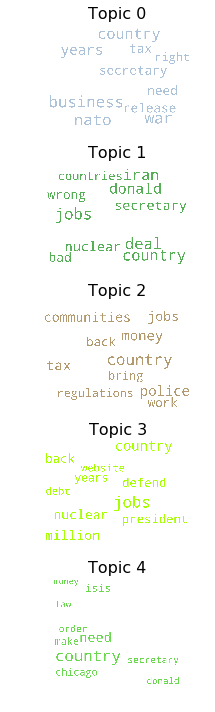

In [44]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.XKCD_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(background_color='white',
                  width=2000,
                  height=1400,
                  max_words=15,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda.show_topics(formatted=False)

fig, axes = plt.subplots(5, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=200)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

### FastText Debate Word Embeddings 

In [45]:
from gensim.models import FastText
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt

model = FastText(cleaned_debate, size=100, window=50, min_count=10, workers=6)
# summarize the loaded model
print(model)
# summarize vocabulary
words = list(model.wv.vocab)

FastText(vocab=78, size=100, alpha=0.025)


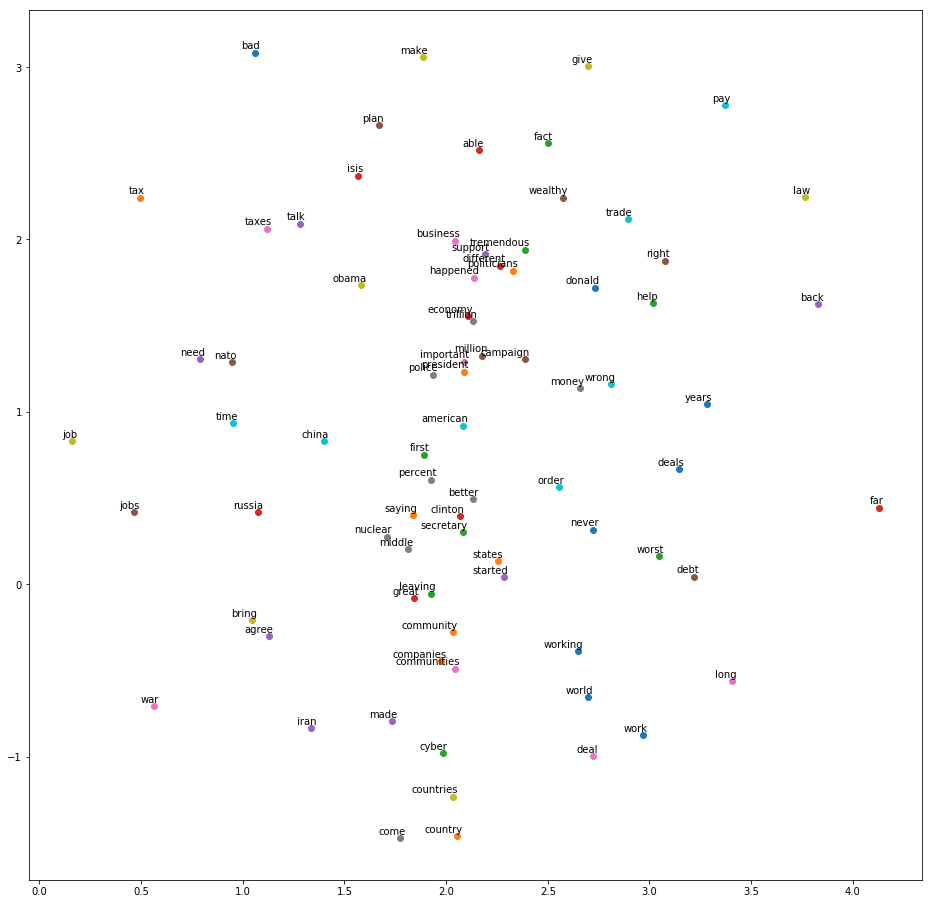

In [46]:
def tsne_plot(model):
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()
tsne_plot(model)

***

# LDA analysis of each segment

- Achieving Prosperity: jobs creation, bringing back expatriated American manufacturers, tax policy.
- Candidates private scandals: Trump’s tax return release, Clinton’s e-mails scandal.
- America’s Direction: healing race relations, police bias, Trump’s questioning Obama’s birth certificate legitimacy.
- Securing America: national institutions cyber attacks, ISIS, homegrown terroristic attacks, Iraq War, nuclear weapons policy.
- Mutual Acceptance & Election Outcome: Trump’s opinion on Clinton’s public figure, acceptance of election outcome.
 ***

In [47]:
Deb_I = list(first_debate.loc['09:04:52':'09:30:11'].TEXT)

In [48]:
Deb_I = [
     [word for word in document.lower().split()]
    for document in Deb_I
 ]

Deb_I = [list(filter(None, [re.sub(r'\d+','', x) for x in y])) for y in
       Deb_I]
# remove words less than two letters
Deb_I = [list(filter(None, [re.sub(r'\W*\b\w{1,2}\b','', x) for x in y])) for y in
       Deb_I]
# remove punctuation
Deb_I = [list(filter(None, [re.sub("[\.\,\…\!\?\:\;\-\—\_\=\*\@\#\$\"\''\``]",'', x) for x in y]))
          for y in Deb_I]
# remove common words and tokenize
stoplist = stopwords.words('english')
stoplist = ['know','believe','you','really','lot','that','get','got','much','many','put','kind','thanks','thank','think','well','take','taken','going','go','things','maybe','something','yes','way','would','could','actually','almost','see','sean','called','thing','let','done','went','say','whether','said','look','one','like','also','good','new','ever','little','cannot','everything','lester','even','hannity'] + list(stoplist)
Deb_I = [
     [word for word in document if word not in stoplist]
    for document in Deb_I
 ]

In [49]:
dictionaryI = corpora.Dictionary(Deb_I)
corpusI = [dictionaryI.doc2bow(text) for text in Deb_I]

total_topics = 3
lda_I = models.LdaModel(corpusI, id2word=dictionaryI, num_topics=total_topics)

In [50]:
lda_I.show_topics(total_topics,10)

[(0,
  '0.018*"country" + 0.014*"want" + 0.011*"jobs" + 0.010*"nafta" + 0.010*"companies" + 0.008*"back" + 0.008*"bring" + 0.008*"money" + 0.007*"work" + 0.007*"clinton"'),
 (1,
  '0.016*"jobs" + 0.012*"tax" + 0.011*"economy" + 0.009*"people" + 0.009*"regulations" + 0.009*"country" + 0.008*"website" + 0.008*"want" + 0.008*"million" + 0.007*"trillion"'),
 (2,
  '0.019*"jobs" + 0.013*"companies" + 0.013*"leaving" + 0.012*"people" + 0.010*"country" + 0.010*"tax" + 0.009*"years" + 0.007*"secretary" + 0.007*"back" + 0.007*"happen"')]

***

In [51]:
Deb_II = list(first_debate.loc['09:31:38':'09:41:42'].TEXT)

In [52]:
Deb_II = [
     [word for word in document.lower().split()]
    for document in Deb_II
 ]
Deb_II = [list(filter(None, [re.sub(r'\d+','', x) for x in y])) for y in
       Deb_II]
# remove words less than two letters
Deb_II = [list(filter(None, [re.sub(r'\W*\b\w{1,2}\b','', x) for x in y])) for y in
       Deb_II]
# remove punctuation
Deb_II = [list(filter(None, [re.sub("[\.\,\…\!\?\:\;\-\—\_\=\*\@\#\$\"\''\``]",'', x) for x in y]))
          for y in Deb_II]
# remove common words and tokenize
stoplist = stopwords.words('english')
stoplist = ['know','believe','you','really','lot','that','get','got','much','many','put','kind','thanks','thank','think','well','take','taken','going','go','things','maybe','something','yes','way','would','could','actually','almost','see','sean','called','thing','let','done','went','say','whether','said','look','one','like','also','good','new','ever','little','cannot','everything','lester','even','hannity'] + list(stoplist)
Deb_II = [
     [word for word in document if word not in stoplist]
    for document in Deb_II
 ]

In [53]:
dictionaryII = corpora.Dictionary(Deb_II)
corpusII = [dictionaryII.doc2bow(text) for text in Deb_II]

total_topics = 3
lda_II = models.LdaModel(corpusII, id2word=dictionaryII, num_topics=total_topics)


#IF: (IndexError: index 391 is out of bounds for axis 1 with size 386) THEN shut down and restart the kernel

In [54]:
lda_II.show_topics(total_topics,10)

[(0,
  '0.018*"tax" + 0.016*"years" + 0.012*"returns" + 0.011*"country" + 0.010*"business" + 0.010*"income" + 0.009*"audit" + 0.009*"federal" + 0.008*"people" + 0.008*"release"'),
 (1,
  '0.021*"country" + 0.014*"people" + 0.013*"tax" + 0.012*"business" + 0.009*"returns" + 0.009*"money" + 0.009*"zero" + 0.008*"give" + 0.007*"paid" + 0.007*"trillion"'),
 (2,
  '0.017*"country" + 0.015*"release" + 0.013*"people" + 0.013*"audit" + 0.010*"audited" + 0.009*"laws" + 0.008*"business" + 0.008*"year" + 0.008*"releases" + 0.008*"returns"')]

***

In [55]:
Deb_III = list(first_debate.loc['09:44:06':'10:04:10'].TEXT)

In [56]:
Deb_III = [
     [word for word in document.lower().split()]
    for document in Deb_III
 ]
Deb_III = [list(filter(None, [re.sub(r'\d+','', x) for x in y])) for y in
       Deb_III]
# remove words less than two letters
Deb_III = [list(filter(None, [re.sub(r'\W*\b\w{1,2}\b','', x) for x in y])) for y in
       Deb_III]
# remove punctuation
Deb_III = [list(filter(None, [re.sub("[\.\,\…\!\?\:\;\-\—\_\=\*\@\#\$\"\''\``]",'', x) for x in y]))
          for y in Deb_III]
# remove common words and tokenize
stoplist = stopwords.words('english')
stoplist = ['know','believe','you','really','lot','that','get','got','much','many','put','kind','thanks','thank','think','well','take','taken','going','go','things','maybe','something','yes','way','would','could','actually','almost','see','sean','called','thing','let','done','went','say','whether','said','look','one','like','also','good','new','ever','little','cannot','everything','lester','even','hannity'] + list(stoplist)
Deb_III = [
     [word for word in document if word not in stoplist]
    for document in Deb_III
 ]

In [60]:
dictionaryIII = corpora.Dictionary(Deb_III)
corpusIII = [dictionaryIII.doc2bow(text) for text in Deb_III]

total_topics = 3
lda_III = models.LdaModel(corpusIII, id2word=dictionaryIII, num_topics=total_topics)

In [62]:
lda_III.show_topics(total_topics,10)

[(0,
  '0.017*"people" + 0.012*"want" + 0.012*"police" + 0.010*"country" + 0.008*"need" + 0.008*"order" + 0.008*"law" + 0.006*"communities" + 0.006*"gun" + 0.005*"young"'),
 (1,
  '0.010*"people" + 0.008*"campaign" + 0.008*"bring" + 0.007*"true" + 0.006*"nobody" + 0.006*"community" + 0.005*"sent" + 0.005*"trying" + 0.005*"obama" + 0.005*"tell"'),
 (2,
  '0.015*"people" + 0.014*"need" + 0.013*"police" + 0.012*"communities" + 0.010*"chicago" + 0.009*"community" + 0.008*"want" + 0.008*"order" + 0.007*"right" + 0.007*"africanamerican"')]

*** 
<br>

In [63]:
Deb_IV = list(first_debate.loc['10:06:26':'10:31:51'].TEXT)

In [64]:
Deb_IV = [
     [word for word in document.lower().split()]
    for document in Deb_IV
 ]
Deb_IV = [list(filter(None, [re.sub(r'\d+','', x) for x in y])) for y in
       Deb_IV]
# remove words less than two letters
Deb_IV = [list(filter(None, [re.sub(r'\W*\b\w{1,2}\b','', x) for x in y])) for y in
       Deb_IV]
# remove punctuation
Deb_IV = [list(filter(None, [re.sub("[\.\,\…\!\?\:\;\-\—\_\=\*\@\#\$\"\''\``]",'', x) for x in y]))
          for y in Deb_IV]
# remove common words and tokenize
stoplist = stopwords.words('english')
stoplist = ['know','believe','you','really','lot','that','get','got','much','many','put','kind','thanks','thank','think','well','take','taken','going','go','things','maybe','something','yes','way','would','could','actually','almost','see','sean','called','thing','let','done','went','say','whether','said','look','one','like','also','good','new','ever','little','cannot','everything','lester','even','hannity'] + list(stoplist)
Deb_IV = [
     [word for word in document if word not in stoplist]
    for document in Deb_IV
 ]

In [65]:
dictionaryIV = corpora.Dictionary(Deb_IV)
corpusIV = [dictionaryIV.doc2bow(text) for text in Deb_IV]

total_topics = 3
lda_IV = models.LdaModel(corpusIV, id2word=dictionaryIV, num_topics=total_topics)

In [66]:
lda_IV.show_topics(total_topics,10)

[(0,
  '0.008*"nuclear" + 0.008*"iran" + 0.008*"war" + 0.008*"nato" + 0.007*"russia" + 0.007*"secretary" + 0.006*"isis" + 0.006*"people" + 0.006*"defend" + 0.005*"deal"'),
 (1,
  '0.012*"war" + 0.008*"isis" + 0.007*"iraq" + 0.006*"need" + 0.006*"secretary" + 0.005*"donald" + 0.005*"nato" + 0.005*"people" + 0.005*"temperament" + 0.005*"information"'),
 (2,
  '0.014*"nuclear" + 0.009*"iran" + 0.007*"nato" + 0.007*"isis" + 0.007*"donald" + 0.007*"country" + 0.006*"secretary" + 0.006*"information" + 0.006*"time" + 0.006*"weapons"')]

*** 
<br>

In [67]:
Deb_V = list(first_debate.loc['10:33:04':'10:37:43'].TEXT)

In [68]:
Deb_V = [
     [word for word in document.lower().split()]
    for document in Deb_V
 ]
Deb_V = [list(filter(None, [re.sub(r'\d+','', x) for x in y])) for y in
       Deb_V]
# remove words less than two letters
Deb_V = [list(filter(None, [re.sub(r'\W*\b\w{1,2}\b','', x) for x in y])) for y in
       Deb_V]
# remove punctuation
Deb_V = [list(filter(None, [re.sub("[\.\,\…\!\?\:\;\-\—\_\=\*\@\#\$\"\''\``]",'', x) for x in y]))
          for y in Deb_V]
# remove common words and tokenize
stoplist = stopwords.words('english')
stoplist = ['know','believe','you','really','lot','that','get','got','much','many','put','kind','thanks','thank','think','well','take','taken','going','go','things','maybe','something','yes','way','would','could','actually','almost','see','sean','called','thing','let','done','went','say','whether','said','look','one','like','also','good','new','ever','little','cannot','everything','lester','even','hannity'] + list(stoplist)
Deb_V = [
     [word for word in document if word not in stoplist]
    for document in Deb_V
 ]

In [69]:
dictionaryV = corpora.Dictionary(Deb_V)
corpusV = [dictionaryV.doc2bow(text) for text in Deb_V]

total_topics = 2
lda_V = models.LdaModel(corpusV, id2word=dictionaryV, num_topics=total_topics)

In [70]:
lda_V.show_topics(total_topics,10)

[(0,
  '0.024*"experience" + 0.021*"stamina" + 0.017*"bad" + 0.015*"able" + 0.014*"country" + 0.013*"support" + 0.013*"people" + 0.012*"deal" + 0.011*"name" + 0.011*"hillary"'),
 (1,
  '0.014*"hillary" + 0.013*"spent" + 0.013*"find" + 0.013*"stamina" + 0.012*"tell" + 0.010*"want" + 0.010*"untrue" + 0.010*"nice" + 0.010*"hundreds" + 0.010*"deserve"')]